In [1]:
!pip install kaggle

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'namnguyenvu'
os.environ['KAGGLE_KEY'] = 'd04cad89bd7c90662e9d0abf705c0a9f'

In [3]:
!kaggle competitions download -c quora-insincere-questions-classification

100% 6.02G/6.03G [01:27<00:00, 95.6MB/s]
100% 6.03G/6.03G [01:27<00:00, 73.7MB/s]


In [4]:
!unzip quora-insincere-questions-classification.zip -d data

Archive:  quora-insincere-questions-classification.zip
  inflating: data/embeddings.zip     
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [3]:
import pandas as pd
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
train_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [5]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


I. Supervised Learning




1. K-Nearest Neighbors (KNN)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'texts' is your text data and 'labels' is the target
vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(texts)
# y = labels
X = vectorizer.fit_transform(train_df['question_text'])
y = train_df['target']

In [9]:
print(X.shape, y.shape)

(1306122, 5000) (1306122,)


In [10]:
X_trial = X[:20000]
y_trial = y[:20000]

X_train, X_test, y_train, y_test = train_test_split(X_trial, y_trial, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16000, 5000) (16000,)
(4000, 5000) (4000,)


In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.93975


In [13]:
knn

KNeighborsClassifier()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'texts' is your text data and 'labels' is the target
vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(texts)
# y = labels
X = vectorizer.fit_transform(train_df['question_text'])
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X[:20000], y[:20000], test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.93975


2. Naive Bayes

In [15]:
X.shape

(1306122, 5000)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X[:100000], y[:100000], test_size=0.2, random_state=42)

In [17]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.94365


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9471451813570677


3. Logistic Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X[:20000], y[:20000], test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.94375


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9529907168150062


4. Support Vector Machine (SVM)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X[:15000], y[:15000], test_size=0.2, random_state=42)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")

Accuracy: 0.942
Precision: 0.625


5. Neural Networks

a, Use CPU

In [38]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X[:15000], y[:15000], test_size=0.2, random_state=42)

In [35]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f"Accuracy: {accuracy}")

# Save the model
model.save('sentiment_analysis_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 297ms/step - accuracy: 0.9335 - loss: 0.2608 - val_accuracy: 0.9342 - val_loss: 0.2458
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 72s 239ms/step - accuracy: 0.9429 - loss: 0.2221 - val_accuracy: 0.9342 - val_loss: 0.2516
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 84s 247ms/step - accuracy: 0.9407 - loss: 0.2324 - val_accuracy: 0.9342 - val_loss: 0.2428
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 102s 340ms/step - accuracy: 0.9376 - loss: 0.2373 - val_accuracy: 0.9342 - val_loss: 0.2435
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 115s 252ms/step - accuracy: 0.9322 - loss: 0.2508 - val_accuracy: 0.9342 - val_loss: 0.2446
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9405 - loss: 0.2261


Accuracy: 0.9413333535194397


b, Use GPU

In [39]:
device_name = '/device:GPU:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'
device_name

'/cpu:0'

In [ ]:
with tf.device(device_name):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]),
        GlobalAveragePooling1D(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, validation_split=0.2)

    loss, accuracy = model.evaluate(X_test.toarray(), y_test)
    print(f"Accuracy: {accuracy}")

    # Save the model
    model.save('sentiment_analysis_model.h5')

print(f"Using device: {device_name}")

II. Unsupervised

1. K-Means Clustering

In [6]:
kMeanClustering_df = test_df[:10000]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-7-a67ca9fc2b7d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kMeanClustering_df['cluster'] = kmeans.fit_predict(X_test)


cluster
0    6850
1    3150
Name: count, dtype: int64


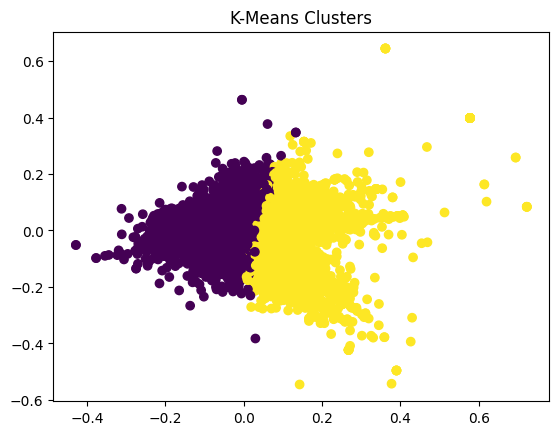

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Assuming kMeanClustering_df contains the 'question_text' column
vectorizer = TfidfVectorizer(max_features=5000)
X_test = vectorizer.fit_transform(kMeanClustering_df['question_text'])

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kMeanClustering_df['cluster'] = kmeans.fit_predict(X_test)

# Analyze the cluster distribution
print(kMeanClustering_df['cluster'].value_counts())

# (Optional) Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_test.toarray())
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kMeanClustering_df['cluster'])
plt.title("K-Means Clusters")
plt.show()

2. Principal Component Analysis (PCA)

In [8]:
PCA_df = test_df[:10000]

<ipython-input-9-4f03fe6c9542>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCA_df['pca_1'] = principal_components[:, 0]
<ipython-input-9-4f03fe6c9542>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCA_df['pca_2'] = principal_components[:, 1]


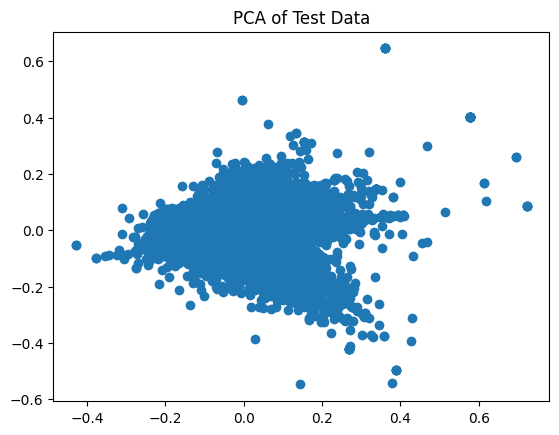

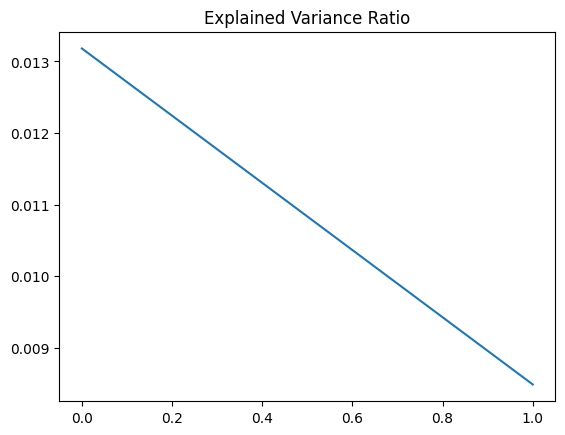

In [9]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_test.toarray())
PCA_df['pca_1'] = principal_components[:, 0]
PCA_df['pca_2'] = principal_components[:, 1]

# Visualize the principal components
plt.scatter(PCA_df['pca_1'], PCA_df['pca_2'])
plt.title("PCA of Test Data")
plt.show()

# Visualize the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.title("Explained Variance Ratio")
plt.show()

3. Classification Neural Networks using TensorFlow

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X[:15000], y[:15000], test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split

# Preprocess the training data
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['question_text'])
y_train = train_df['target']

# Train-Test split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_split.toarray(), y_train_split, epochs=5, batch_size=32, validation_data=(X_val_split.toarray(), y_val_split))

# Predict on the test data
X_test = vectorizer.transform(test_df['question_text'])
test_df['predicted_target'] = model.predict(X_test.toarray())
test_df['predicted_target'] = (test_df['predicted_target'] > 0.5).astype(int)

4. Linear Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[:15000], y[:15000], test_size=0.2, random_state=42)

In [18]:
linreg_df = test_df[:3000]

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg_df['regression_target'] = linreg.predict(X_test)
linreg_df['regression_target'] = (linreg_df['regression_target'] > 0.5).astype(int)

<ipython-input-19-5510de96703e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linreg_df['regression_target'] = linreg.predict(X_test)
<ipython-input-19-5510de96703e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linreg_df['regression_target'] = (linreg_df['regression_target'] > 0.5).astype(int)


5. Regression Neural Network using TensorFlow


In [35]:
X_train, X_val, y_train, y_val = train_test_split(X[:15000], y[:15000], test_size=0.2, random_state=42)

In [36]:
regnn_df = test_df[:3000]

In [37]:
X_test

<3000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 30211 stored elements in Compressed Sparse Row format>

In [38]:
# Build a simple regression neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)  # No activation function, since this is regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Predict on the test data
regnn_df['regression_nn_target'] = model.predict(X_test.toarray())
regnn_df['regression_nn_target'] = (regnn_df['regression_nn_target'] > 0.5).astype(int)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0582 - val_loss: 0.0443
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0319 - val_loss: 0.0475
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0182 - val_loss: 0.0501
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0104 - val_loss: 0.0518
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0069 - val_loss: 0.0530
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<ipython-input-38-7c0771772193>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regnn_df['regression_nn_target'] = model.predict(X_test.toarray())
<ipython-input-38-7c0771772193>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regnn_df['regression_nn_target'] = (regnn_df['regression_nn_target'] > 0.5).astype(int)
